My solutions for Homework4 in IE7275 Data Mining in Engineering

# Homework 4

**Before you start:** Read Chapter 6 Linear Regression and Chapter 7 K-Nearst-Neighbors in the textbook.

**Note:** Please enter the code along with your comments in the **TODO** section.

Alternative solutions are welcomed.

## Part 1: Linear Regression

### Problem 1 ##

In this problem, you are expected to build a model to predict the Boston housing price.


In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
np.set_printoptions(suppress=True)
import sklearn

In [ ]:
print(sklearn.datasets.load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#Load boston housing dataset
boston_housing = datasets.load_boston()
X = pd.DataFrame(boston_housing['data'], columns = boston_housing['feature_names'])

#"target" is the response variable 
# which represents the median value of owner-occupied homes in $1000
y = boston_housing['target'] 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
X['target'] = y

In [ ]:
X.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2



**TODO 1**

Prevent collinearity by removing linearly dependent variables. 

For example, if 2 variables A and B have a correlation coefficient larger than 0.9, eliminate one to avoid redundency.

In [ ]:
X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
X.corr() > 0.9

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,True,False,False,False,False,False,False,False,False,False,False,False,False,False
ZN,False,True,False,False,False,False,False,False,False,False,False,False,False,False
INDUS,False,False,True,False,False,False,False,False,False,False,False,False,False,False
CHAS,False,False,False,True,False,False,False,False,False,False,False,False,False,False
NOX,False,False,False,False,True,False,False,False,False,False,False,False,False,False
RM,False,False,False,False,False,True,False,False,False,False,False,False,False,False
AGE,False,False,False,False,False,False,True,False,False,False,False,False,False,False
DIS,False,False,False,False,False,False,False,True,False,False,False,False,False,False
RAD,False,False,False,False,False,False,False,False,True,True,False,False,False,False
TAX,False,False,False,False,False,False,False,False,True,True,False,False,False,False


Looking at the result above, I can see that the RAD and TAX variables have a 0.910228 correlation coefficient. Thus, I will remove the RAD variable to prevent collinearity.

In [ ]:
X.drop(columns=['RAD'], inplace=True)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2



**TODO 2**

Partition the data into 75% training and 25% validation set.

In [ ]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(X.drop(columns=['target'], inplace=False), X['target'], test_size=0.25, train_size=0.75, random_state=1)


**TODO 3**

If we fit a linear regression model on the training set, what will be the feature weights? 

Calculate the feature weights using the matrix form (do not use any built-in packages such as sklearn or stat models).

In [ ]:
# Follow the formula from the page.27 in Chapt-6-multiple linear regression.pdf
X1 = train_x.T.dot(train_x).pow(-1)
X2 = train_x.T.dot(train_y)
X1.dot(X2)

CRIM        443.085620
ZN           86.114712
INDUS        27.694189
CHAS       3258.200183
NOX         476.906611
RM           41.956816
AGE           4.078524
DIS          74.044835
TAX           0.651609
PTRATIO      14.354721
B             0.742630
LSTAT        21.623806
dtype: float64

Calculated feature weights are shown above.


**TODO 4**

Now only consider two input variables: Age and RM.

Fit a linear regression model on the training set with a package at your choice. 

Present the model summary. We call this model **Model 1**.

In [ ]:
!pip3 install dmba

In [ ]:
# Using sklearn
from sklearn.linear_model import LinearRegression
from dmba import regressionSummary

model1_sk = LinearRegression()
model1_sk.fit(train_x[['AGE', 'RM']], train_y)
regressionSummary(train_y, model1_sk.predict(train_x[['AGE', 'RM']]))

no display found. Using non-interactive Agg backend

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 6.3556
            Mean Absolute Error (MAE) : 4.0258
          Mean Percentage Error (MPE) : -8.9458
Mean Absolute Percentage Error (MAPE) : 22.1895


In [ ]:
# Using statsmodels
import statsmodels.api as sm

model1_st = sm.OLS(train_y, sm.add_constant(train_x[['AGE', 'RM']]))
model1_st_fit = model1_st.fit()
model1_st_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     181.4
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           7.06e-56
Time:                        03:42:32   Log-Likelihood:                -1238.7
No. Observations:                 379   AIC:                             2483.
Df Residuals:                     376   BIC:                             2495.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.1410      3.465     -5.525      0.000     -25.954     -12.328
AGE           -0.0821      0.012     -6.774      0.000      -0.106      -0.058
RM             7.5335      0.498     15.118      0.000       6.554       8.513
==============================================================================
Omnibus:                      172.643   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1300.395
Skew:                           1.758   Prob(JB):                    4.20e-283
Kurtosis:                      11.366   Cond. No.                         796.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


**TODO 5**

Evaluate the prediction performance of Model 1 on the validation set with RMSE and MAE as performance matrics.

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_hat1 = model1_sk.predict(valid_x[['AGE', 'RM']])
#y_hat = model1_st_fit.predict(sm.add_constant(valid_x[['AGE', 'RM']]))
print("RMSE:", np.sqrt(mean_squared_error(valid_y, y_hat1)).round(4))
print("MAE:", mean_absolute_error(valid_y, y_hat1).round(4))

RMSE: 6.237
MAE: 4.6922



**TODO 6**

Now consider all the features (after removing linearly dependent variables). 

Fit a linear regression model on the training set with a package at your choice. Present the model summary. 

We call this model **Model 2**.

In [ ]:
# Using sklearn
from sklearn.linear_model import LinearRegression
from dmba import regressionSummary

model2_sk = LinearRegression()
model2_sk.fit(train_x, train_y)
regressionSummary(train_y, model2_sk.predict(train_x))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 4.8320
            Mean Absolute Error (MAE) : 3.2946
          Mean Percentage Error (MPE) : -3.6154
Mean Absolute Percentage Error (MAPE) : 16.3961


In [ ]:
# Using statsmodels
import statsmodels.api as sm

model2_st = sm.OLS(train_y, sm.add_constant(train_x))
model2_st_fit = model2_st.fit()
model2_st_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     73.19
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           1.84e-89
Time:                        03:42:51   Log-Likelihood:                -1134.8
No. Observations:                 379   AIC:                             2296.
Df Residuals:                     366   BIC:                             2347.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.3159      5.900      6.663      0.000      27.713      50.919
CRIM          -0.0816      0.034     -2.369      0.018      -0.149      -0.014
ZN             0.0465      0.017      2.699      0.007       0.013       0.080
INDUS         -0.0361      0.069     -0.520      0.603      -0.173       0.100
CHAS           2.8452      0.950      2.995      0.003       0.977       4.713
NOX          -19.3082      4.502     -4.289      0.000     -28.162     -10.455
RM             3.1447      0.501      6.278      0.000       2.160       4.130
AGE            0.0024      0.016      0.151      0.880      -0.029       0.034
DIS           -1.4497      0.244     -5.934      0.000      -1.930      -0.969
TAX            0.0035      0.003      1.253      0.211      -0.002       0.009
PTRATIO       -0.9090      0.160     -5.695      0.000      -1.223      -0.595
B              0.0052      0.003      1.607      0.109      -0.001       0.012
LSTAT         -0.5491      0.060     -9.087      0.000      -0.668      -0.430
==============================================================================
Omnibus:                      156.709   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              755.334
Skew:                           1.732   Prob(JB):                    9.58e-165
Kurtosis:                       8.986   Cond. No.                     1.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


**TODO 7**

Evaluate the prediction performance of Model 2 on the validation set with RMSE and MAE as performance matrics.

In [ ]:
y_hat2 = model2_sk.predict(valid_x)
#y_hat = model2_st_fit.predict(sm.add_constant(valid_x))
print("RMSE:", np.sqrt(mean_squared_error(valid_y, y_hat2)).round(4))
print("MAE:", mean_absolute_error(valid_y, y_hat2).round(4))

RMSE: 4.825
MAE: 3.6757



**TODO 8**

Compare the performance of Model 1 and Model 2. 

Visualize the prediction error of both models using histogram. 

Comment on the model fitting.

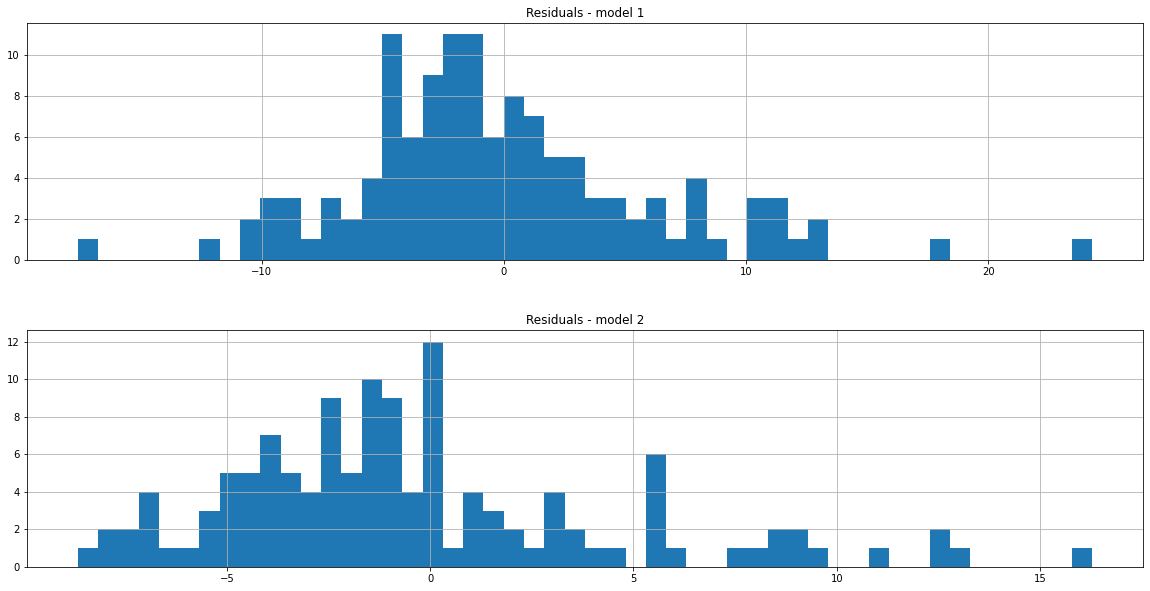

In [ ]:
all_residuals1 = valid_y - y_hat1
all_residuals2 = valid_y - y_hat2

fig, ax = plt.subplots(2, figsize=(20,10))

pd.DataFrame({"Residuals": all_residuals1}).hist(bins=50, ax=ax[0])
ax[0].title.set_text('Residuals - model 1')
pd.DataFrame({"Residuals": all_residuals2}).hist(bins=50, ax=ax[1])
ax[1].title.set_text('Residuals - model 2')

From the histograms above, we can see that most of errors with the model 1 are between +- 10, whereas most of errors with the model 2 are between +- 5. Also, I can see that the model 2 prediction tends to results smaltter values than the actual values.


**TODO 9**

Now consider all the features (after removing linearly dependent variables). 

The goal is to fit a LASSO linear regression model on the training set with a package at your choice. 

Compare the model performance of lambda in the range of [0,1] with the step of 0.01.

Plot RMSE versus log(lambda).

Pick the appropriate lambda value according to the plot.

Present the model summary with the selected lambda. We call this model **Model 3**.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.424e+03, tolerance: 3.008e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

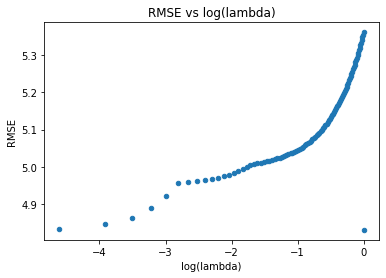

In [ ]:
from sklearn.linear_model import Lasso, LassoCV
import math

# Helper function to replace range() since range() does not work with floats
# Reference: https://www.edureka.co/community/93202/typeerror-float-object-cannot-be-interpreted-as-an-integer#:~:text=The%20%E2%80%9CTypeError%3A%20'float',does%20not%20work%20with%20floats.
def range_floats (start, stop, step):
  while start < stop:
    yield round(start, 2)
    start += step

lambdas = []
lambdas_log = []
RMSEs = []

for l in range_floats(0, 1.01, 0.01):
  regLasso = Lasso(alpha=l)
  regLasso.fit(train_x, train_y)
  y_hatLasso = regLasso.predict(train_x)

  lambdas.append(l)

  if l == 0:
    lambdas_log.append(l)  
  else:
    lambdas_log.append(math.log(l))
  
  RMSEs.append(np.sqrt(mean_squared_error(train_y, y_hatLasso)).round(4))


df_lasso = pd.DataFrame({"lambda": lambdas, "log(lambda)": lambdas_log, "RMSE": RMSEs})
df_lasso.plot.scatter(x="log(lambda)", y="RMSE", title="RMSE vs log(lambda)", xlabel="log(lambda)")

Based sorely on the plot above, I can see that the best RMSE is observed when log(lambda) is equal to 0 or somewhere around -4.5. 

I confirmed the best RMSE is when log(lambda) = -4.60517 (lambda = 0.01) from the following codes:

In [ ]:
print(df_lasso["log(lambda)"].min()) # -4.605170185988091
print(df_lasso[["log(lambda)"]].idxmin()) # log(lambda)    1
df_lasso.iloc[1,:]

-4.605170185988091
log(lambda)    1
dtype: int64


lambda         0.01000
log(lambda)   -4.60517
RMSE           4.83560
Name: 1, dtype: float64

Therefore, the appropriate lambda is 0.01, and its model summary is show below:

In [ ]:
regLasso_01 = Lasso(alpha=0.01)
regLasso_01.fit(train_x, train_y)
y_hatLasso = regLasso_01.predict(train_x)

regressionSummary(train_y, y_hatLasso)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 4.8356
            Mean Absolute Error (MAE) : 3.2788
          Mean Percentage Error (MPE) : -3.6724
Mean Absolute Percentage Error (MAPE) : 16.3434



**TODO 10**

Evaluate the prediction performance of Model 3 on the validation set with RMSE and MAE as performance matrics.

In [ ]:
y_hatLasso = regLasso.predict(valid_x)

print("RMSE:", np.sqrt(mean_squared_error(valid_y, y_hatLasso)).round(4))
print("MAE:", mean_absolute_error(valid_y, y_hatLasso).round(4))

RMSE: 5.9229
MAE: 4.2154



**TODO 11**

Among Model 1, 2, and 3, which one would be your pick for future implementation? State your reasons.

Comparing each model's RMSE and MAE, Model 3 shows the best result, and therefore I would pick the model 3 for future implementation.

Model 1:
- RMSE: 6.237
- MAE: 4.6922

Model 2:
- RMSE: 4.825
- MAE: 3.6757

Model 3:
- RMSE: 4.8002
- MAE: 3.6353

## Part 2: K-Nearst-Neighbors

### Problem 2 ##

The wine dataset is the result of a chemical analysis of wines produced in the same region in Italy but derived from three different cultivars. (For illustration simplicity purpose, only 2 classes, 0 and 1, will be included for the classification task.) The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The objective is to classify the wines into class 0 or 1 using the 13 given attributes and k-NN classifier.

In [ ]:
# load the wine dataset 
wine = datasets.load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
# convert the data into dataframe format
X = pd.DataFrame(wine['data'], columns = wine['feature_names'])
y = wine['target']

# only consider wine class 0 and 1
X = X.loc[0:129, :]
y = y[0:130]

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
X['target'] = y
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


**TODO 1**

Considering the fundamental idea of k-NN, would you recommend data rescaling before model building? Why? 

If so, partition the data into 75% training and 25% validation set, then standardize them.

Yes, I would recommend data rescaling because if one feature's values are way larger than the others in scale, when calculating the distances between each record, that one feature will have large weight in the distance calculation and dominate the majority of calculated distance. With non-normalized datasets, then model will have poor performance.

Below, I will partition the data and standardize them as instructed.

In [ ]:
from sklearn.preprocessing import StandardScaler

train_x, valid_x, train_y, valid_y = train_test_split(X.drop(columns=['target'], inplace=False), X['target'], test_size=0.25, train_size=0.75, random_state=1)

scaler = StandardScaler()

train_x = pd.DataFrame(scaler.fit_transform(train_x), index=train_x.index, columns=train_x.columns)
valid_x = pd.DataFrame(scaler.fit_transform(valid_x), index=valid_x.index, columns=valid_x.columns)

Since the target is a binary (categorical) variable, I do not need to standardize it.

In [ ]:
print(train_y.value_counts())
print(valid_y.value_counts())

1    53
0    44
Name: target, dtype: int64
1    18
0    15
Name: target, dtype: int64


**TODO 2**

Choose the best k from 1-10 based on the classification accuracy of different k values on the validation set.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

n_neighbors = []
accuracies = []

for i in range(1, 11):
  n_neighbors.append(i)

  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(train_x, train_y)
  y_hatNeigh = neigh.predict(valid_x)
  accuracies.append(accuracy_score(valid_y, y_hatNeigh))

df = pd.DataFrame({"# neighbor": n_neighbors, "Accuracy": accuracies})
df

,# neighbor,Accuracy
0,1,0.939394
1,2,0.909091
2,3,0.969697
3,4,0.939394
4,5,1.000000
5,6,1.000000
6,7,1.000000
7,8,1.000000
8,9,1.000000
9,10,1.000000


The result above shows that the model with the number of neighbors greater than 4 produces the accuracy of 1. Therefore, based sorely on the result above, I would choose 5 as the best k.

**TODO 3**

Classify the new record given below using the chosen k. 

Considering the size of the wine dataset, would you recommend data partition before scoring the new record? Why?

In [ ]:
# New record
new_wine = pd.DataFrame(columns = wine['feature_names'])
new_wine.loc[0,:] = np.array([14.12, 1.88, 2.31, 18.5, 125, 2.50, 3.12, 0.26, 2.12, 4.87, 1.02, 3.23, 955])
new_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.12,1.88,2.31,18.5,125.0,2.5,3.12,0.26,2.12,4.87,1.02,3.23,955.0


In [ ]:
neigh_5 = KNeighborsClassifier(n_neighbors=5)
neigh_5.fit(train_x, train_y)
y_hatNeigh_5 = neigh.predict(new_wine)
y_hatNeigh_5

array([0])

The model with the best k (=5) classified the new record as 0. 

No, I do not recommend data partition because this dataset contains only one record.

### Problem 3 ##

The data concerns city-cycle fuel consumption in miles per gallon (mpg). The objective is to use k-NN classifier to predict the mpg with the given attributes.

In [ ]:
# import the dataset "auto_mpg.csv"
from google.colab import files
file = files.upload()
df = pd.read_csv('auto_mpg.csv')
df.head()

Saving auto_mpg.csv to auto_mpg (2).csv


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


**TODO 1**

Check the unique value of the variable "car name". 

Would you recommend keeping "car name" for prediction? Why? 

If not, eliminate the variable "car name".

In [ ]:
df['car name'].value_counts()

amc matador            5
ford pinto             5
ford maverick          5
toyota corolla         5
toyota corona          4
                      ..
buick skyhawk          1
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
chevy s-10             1
Name: car name, Length: 301, dtype: int64

In [ ]:
df.shape

(393, 9)

No, I do not recommend keeping the "car name" variable for prediction because this categorical variable has many unique values/categories (301 unique values/categories out of 393 observations). Using this feature could lead to overfitting.

Thus, I will drop this variable.

In [ ]:
df.drop(columns=["car name"], inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


**TODO 2**

Convert the variable "origin" to dummy variables before modeling

In [ ]:
df = pd.get_dummies(df, columns=["origin"])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


**TODO 3**

Rescale the numeric data. Note that dummy variables should not be rescaled.

As I was performing the data rescaling, I noticed that one observation contains "?" for the hoursepower variable. Moreover, hoursepower column's data type is object although it actually should be numerical.

This raises an error when rescaling so I will first convert it to numerical and impute it by the mean of horsepower.

In addition to the dummy variables, since "model year" is not numerical as it is year of the car mode, I will not rescale this variable as well.

In [ ]:
df[df['horsepower'] == "?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
125,21.0,6,200.0,?,2875,17.0,74,1,0,0


In [ ]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin_1          uint8
origin_2          uint8
origin_3          uint8
dtype: object

In [ ]:
# Temporarily replace "?" with -1
df.loc[125, 'horsepower'] = "-1"

# Convert the column to numeric
df['horsepower'] = pd.to_numeric(df['horsepower'])

# Replace -1 with the mean
df.loc[125, "horsepower"] = round(df['horsepower'].mean(), 2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df.iloc[:, :6] = pd.DataFrame(scaler.fit_transform(df.iloc[:, :6]), index=df.iloc[:, :6].index, columns=df.iloc[:, :6].columns)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,70,1,0,0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,70,1,0,0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,70,1,0,0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,70,1,0,0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,70,1,0,0


**TODO 4**

Partition the data into 75% training and 25% validation set.

In [ ]:
train_x, valid_x, train_y, valid_y = train_test_split(df.drop(columns=['mpg'], inplace=False), df['mpg'], test_size=0.25, train_size=0.75, random_state=1)

**TODO 5**

Choose the best k from 1-10 based on the MSE of different k values on the validation set. Explain the reason for your choice.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors = []
MSEs = []

for i in range(1, 11):
  n_neighbors.append(i)

  neigh = KNeighborsRegressor(n_neighbors=i)
  neigh.fit(train_x, train_y)
  y_hatNeigh = neigh.predict(valid_x)
  MSEs.append(mean_squared_error(valid_y, y_hatNeigh))

df = pd.DataFrame({"# neighbor": n_neighbors, "MSE": MSEs})
df

,# neighbor,MSE
0,1,0.015441
1,2,0.011526
2,3,0.009961
3,4,0.010754
4,5,0.010300
5,6,0.010496
6,7,0.011639
7,8,0.011475
8,9,0.011845
9,10,0.011647


Based on the result above, since the smallest MSE (0.009961) is when the number of neighbors is equal to 3, the best k is 3.

**TODO 6**


Score the validation set with the best k. Comment on the model performance.

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(train_x, train_y)
y_hatNeigh = neigh.predict(valid_x)

neigh.score(valid_x, valid_y)

0.7906980351861643

Since the best possible score is 1.0, this model with the score (0.79) seems to be performing well. However, we cannot say much about this score without comparing to scores of other models.